<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Trabajo Practico</h3>
    <h5>Grupo 4</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Braian Drago <p>
        <p>Integrantes: Garnica Hernán - Scime Silvia
</div>

Importamos modulos a utilizar

In [445]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

#!pip install statsmodels


####  Leemos los datos a trabajar


In [446]:
url= 'https://raw.githubusercontent.com/jiang-011/AST_G4/main/dataset/Consumo_TP.csv'
raw_csv_data = pd.read_csv(url, sep=',', decimal='.')
df_consumo=raw_csv_data.copy()

#### Breve resumen del dataset


In [447]:
print(df_consumo.columns)

df_consumo.Consumo.mean()

Index(['Fecha', 'Consumo'], dtype='object')


45.95726011089604

In [448]:
df_consumo.head(10)

,Fecha,Consumo
0,2023-06-05,46.488384
1,2023-05-23,46.161079
2,2023-05-22,45.449817
3,2023-05-20,43.725000
4,2023-05-19,44.884902
5,2023-05-18,46.485462
6,2023-05-17,46.089042
7,2023-05-16,45.802815
8,2023-05-15,45.871810
9,2023-05-13,44.398464


In [449]:
df_consumo.Fecha.describe()

count            757
unique           757
top       2023-06-05
freq               1
Name: Fecha, dtype: object

In [450]:
df_consumo.dtypes

Fecha       object
Consumo    float64
dtype: object

Adaptamos el dataset para trabajarlo segun sus series temporales

In [451]:
df_consumo.Fecha = pd.to_datetime(df_consumo.Fecha, dayfirst = True)

In [452]:
df_consumo.head()

,Fecha,Consumo
0,2023-06-05,46.488384
1,2023-05-23,46.161079
2,2023-05-22,45.449817
3,2023-05-20,43.725000
4,2023-05-19,44.884902


In [453]:
df_consumo.Fecha.describe()

count                     757
unique                    757
top       2023-06-05 00:00:00
freq                        1
first     2021-10-01 00:00:00
last      2023-10-31 00:00:00
Name: Fecha, dtype: object

In [454]:
df_consumo.dtypes

Fecha      datetime64[ns]
Consumo           float64
dtype: object

In [455]:
from skimpy import skim

In [456]:
skim(df_consumo)

┌────────────────────────────── skimpy summary ───────────────────────────────┐
│          Data Summary                Data Types                             │
│ ┌───────────────────┬────────┐ ┌─────────────┬───────┐                      │
│ │ dataframe         │ Values │ │ Column Type │ Count │                      │
│ ├───────────────────┼────────┤ ├─────────────┼───────┤                      │
│ │ Number of rows    │ 757    │ │ datetime64  │ 1     │                      │
│ │ Number of columns │ 2      │ │ float64     │ 1     │                      │
│ └───────────────────┴────────┘ └─────────────┴───────┘                      │
│                                   number                                    │
│ ┌────────┬────┬──────┬──────┬─────┬────┬─────┬─────┬─────┬──────┬────────┐  │
│ │ column │    │      │      │     │    │     │     │     │      │        │  │
│ │ _name  │ NA │ NA % │ mean │ sd  │ p0 │ p25 │ p50 │ p75 │ p100 │ hist   │  │
│ ├────────┼────┼──────┼──────┼─────┼───

Se puede observar que hay al menos 1 día con consumo igual a 0. Se analizará esto.

In [457]:
df_consumo.iloc[df_consumo.Consumo.argmin()]

Fecha      2022-05-17 00:00:00
Consumo                    0.0
Name: 756, dtype: object

El día 2022-05-17 hubo paro de transporte y no hubo carga de combustible, es por este motivo qe retirar del dataset ya que no representa un valor real de consumo.

In [458]:
df_consumo = df_consumo.loc[df_consumo.Consumo>0]

Seteamos como index del dataset segun el dia

In [459]:
df_consumo.set_index("Fecha")

,Consumo
Fecha,
2023-06-05,46.488384
2023-05-23,46.161079
2023-05-22,45.449817
2023-05-20,43.725000
2023-05-19,44.884902
...,...
2022-08-14,42.019789
2022-07-24,39.265885
2023-01-22,46.220412


In [460]:
df_consumo.head()

,Fecha,Consumo
0,2023-06-05,46.488384
1,2023-05-23,46.161079
2,2023-05-22,45.449817
3,2023-05-20,43.725000
4,2023-05-19,44.884902


In [461]:
df_consumo.set_index("Fecha", inplace=True)
df_consumo.head()

,Consumo
Fecha,
2023-06-05,46.488384
2023-05-23,46.161079
2023-05-22,45.449817
2023-05-20,43.725000
2023-05-19,44.884902


#### Adaptamos el datset segun la frecuencia de la serie temporal dada, donde:

- h: por hora
- w: semanal
- d: diario
- m: mensual
- b: dias laborables



In [462]:
df_consumo=df_consumo.asfreq('d')
df_consumo

,Consumo
Fecha,
2021-10-01,45.201497
2021-10-02,39.899719
2021-10-03,39.705724
2021-10-04,45.777167
2021-10-05,46.147136
...,...
2023-10-27,46.582215
2023-10-28,46.426496
2023-10-29,45.175833


In [463]:
df_consumo=df_consumo.asfreq('d')
df_consumo.head()

,Consumo
Fecha,
2021-10-01,45.201497
2021-10-02,39.899719
2021-10-03,39.705724
2021-10-04,45.777167
2021-10-05,46.147136


In [464]:
df_consumo.isna()

,Consumo
Fecha,
2021-10-01,False
2021-10-02,False
2021-10-03,False
2021-10-04,False
2021-10-05,False
...,...
2023-10-27,False
2023-10-28,False
2023-10-29,False


In [465]:
df_consumo.isna().sum()

Consumo    5
dtype: int64

Visualizamos una vez mas el dataset, pero esta vez teniendo en cuenta la serie temporal

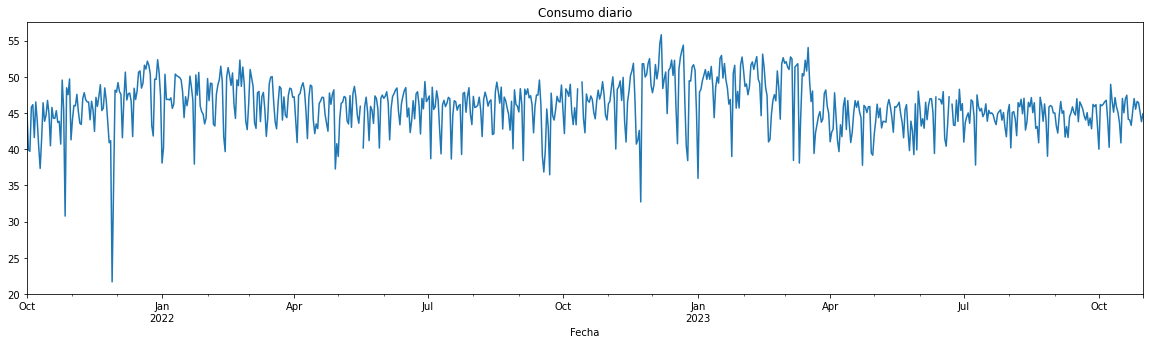

In [466]:
df_consumo.Consumo.plot(figsize=(20,5), title = "Consumo diario")
plt.show()

<AxesSubplot:ylabel='Consumo'>

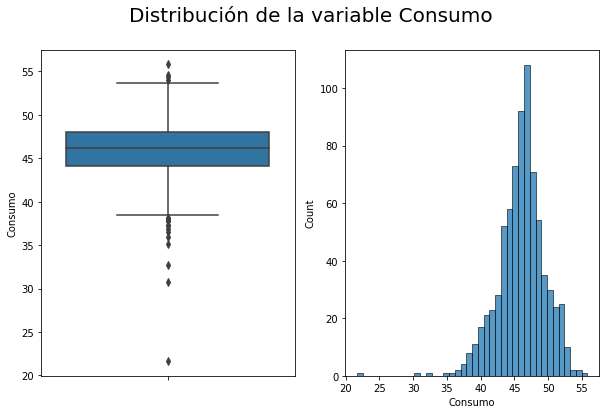

In [467]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle('Distribución de la variable Consumo', fontsize = 20)


sns.histplot(data = df_consumo, x="Consumo", ax = axs[1])
sns.boxplot(y = "Consumo", data = df_consumo, ax = axs[0])


La variable consumo tiene una asimetría a la izquierda, habiendo días en donde el consumo fue muy bajo.

Descomposición de Series Temporales

In [468]:
# Modulo para uso exclusivo aqui
from statsmodels.tsa.seasonal import seasonal_decompose

Descomposicion Aditiva

In [469]:
df_consumo=df_consumo.dropna()

In [470]:
df_consumo.isna().sum()

Consumo    0
dtype: int64

In [471]:
df_consumo = df_consumo.asfreq('d')
df_consumo = df_consumo.fillna(1)

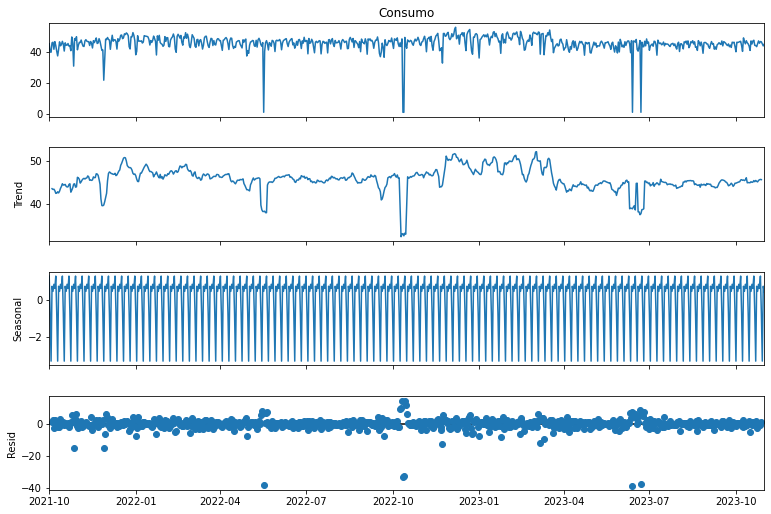

In [472]:
s_dec_additive = seasonal_decompose(df_consumo.Consumo, model = "adittive")
fig = s_dec_additive.plot()
fig.set_size_inches(12,8)
plt.show()

*COMENTARIO NUEVO 2*

Al hacer la descomposicion de la serie se pueden observar 4 caracteristicas =
- El ciclo
- La tendecia   
- La estacionalidad  ---> la serie no presenta esta caracteristica. Por ello, se ve asi la grafica.
- Movimientoes irregulares ( el error )

Para mayor informacion, tanto la tendencia como la estacionalidad son componentes de NO estacionariedad. ( dicho termino, se analizara en detalle en las proximos clases )

Descomposicion Multiplicativa

In [473]:
import matplotlib

matplotlib.rcParams['figure.figsize']=[12.0,8.0]

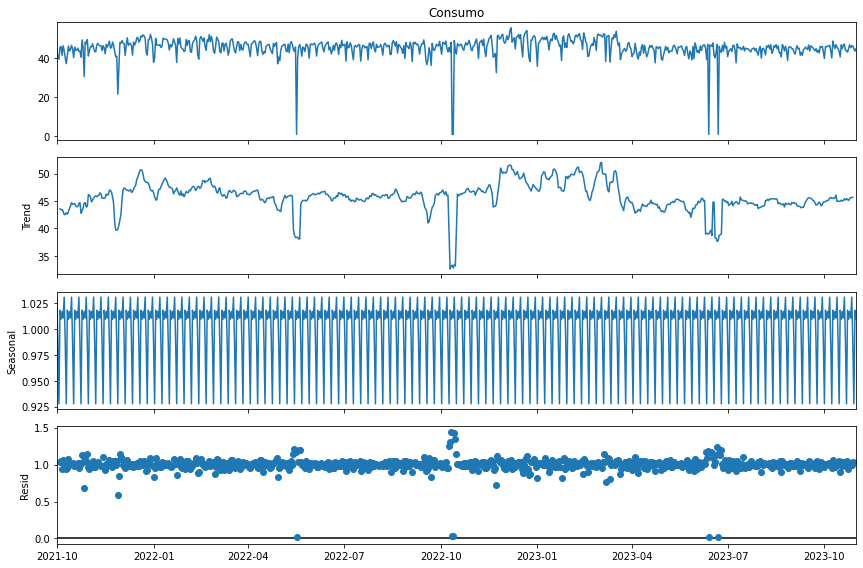

In [474]:
s_dec_multiplicative = seasonal_decompose(df_consumo.Consumo, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

Representación gráfica de la Función de Autocorrelación

In [475]:
# Modulo para uso exclusivo a partir de aqui
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

In [476]:
matplotlib.rcParams['figure.figsize']=[6.0,4.0]

Grafico ACF del indice Standard & Poor's 500 (SPX)

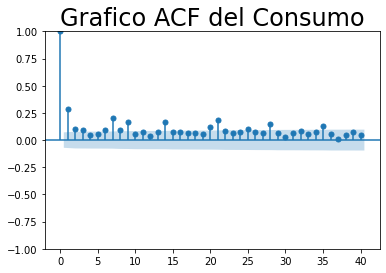

In [477]:
plot_acf(df_consumo.Consumo,lags=40)
plt.title("Grafico ACF del Consumo", size= 24)
plt.show()

*COMENTARIO NUEVO 3*

El grafico es el llamado de autocorrelacion. En el mismo, nos da una primera aproximacion de estacionariedad o no estacionariedad (recuerden que es una primera aproximacion, no definitiva, que luego se testea para confirmar ) .

En este caso, la grafica presenta signos de no estacionarieda. Ya que tiene un decrecimiento lineal que no llega a bajar en el tiempo.

APLICAMOS UNA TRANSFORMACION DE LA SERIE

In [478]:
primera_diffs=df_consumo.Consumo.values[1:]-df_consumo.Consumo.values[:-1]
primera_diffs=np.concatenate([primera_diffs,[0]])

In [479]:
df_consumo['primera_diffs_Consumo']=primera_diffs

In [480]:
df_consumo.head()

,Consumo,primera_diffs_Consumo
Fecha,,
2021-10-01,45.201497,-5.301778
2021-10-02,39.899719,-0.193995
2021-10-03,39.705724,6.071443
2021-10-04,45.777167,0.369969
2021-10-05,46.147136,-4.538013


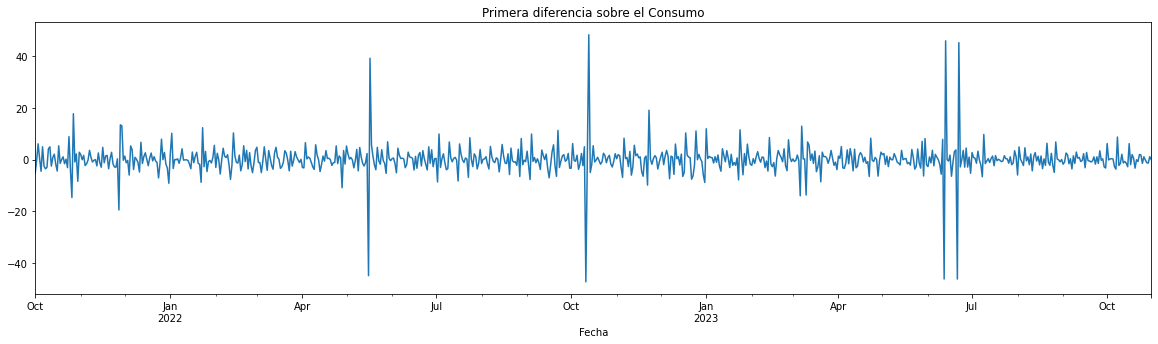

In [481]:
#grafico este indice con las diferencias aplicadas fila a fila
df_consumo.primera_diffs_Consumo.plot(figsize=(20,5), title = "Primera diferencia sobre el Consumo")
plt.show()

*COMENTARIO NUEVO 4*

En este caso, vemos la grafica de la primera diferencia de la serie original. Nos muestra una caracteristia del Ruido blanco ( White noise ).

Caracteristicas generales White noise =

- TIENE REVERSION A LA MEDIA
- VALOR ESPERADO CONSTANTE = 0
- VOLATILIDAD CONSTANTE EN EL TIEMPO



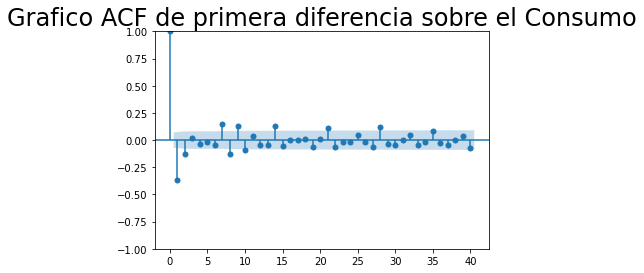

In [482]:
plot_acf(df_consumo.primera_diffs_Consumo,lags=40)
plt.title("Grafico ACF de primera diferencia sobre el Consumo", size= 24)
plt.show()

*COMENTARIO NUEVO 5*

En este caso, vemos la funcion de autocorrelacion de la primera diferencia de la serie original.
Vemos el cambio sustancial con respecto a la serie original. El mismo nos podria dar a la interpretacion que estamos en presencia de una serie estacionaria. Recordamos que siempre hay que testear para llegar a la conclusion definitiva.


Ruido Blanco

In [483]:
wn = np.random.normal(loc = df_comp.spx.mean(), scale = df_comp.spx.std(), size = len(df_comp))
df_comp['wn'] = wn
df_comp.describe()

NameError: name 'df_comp' is not defined

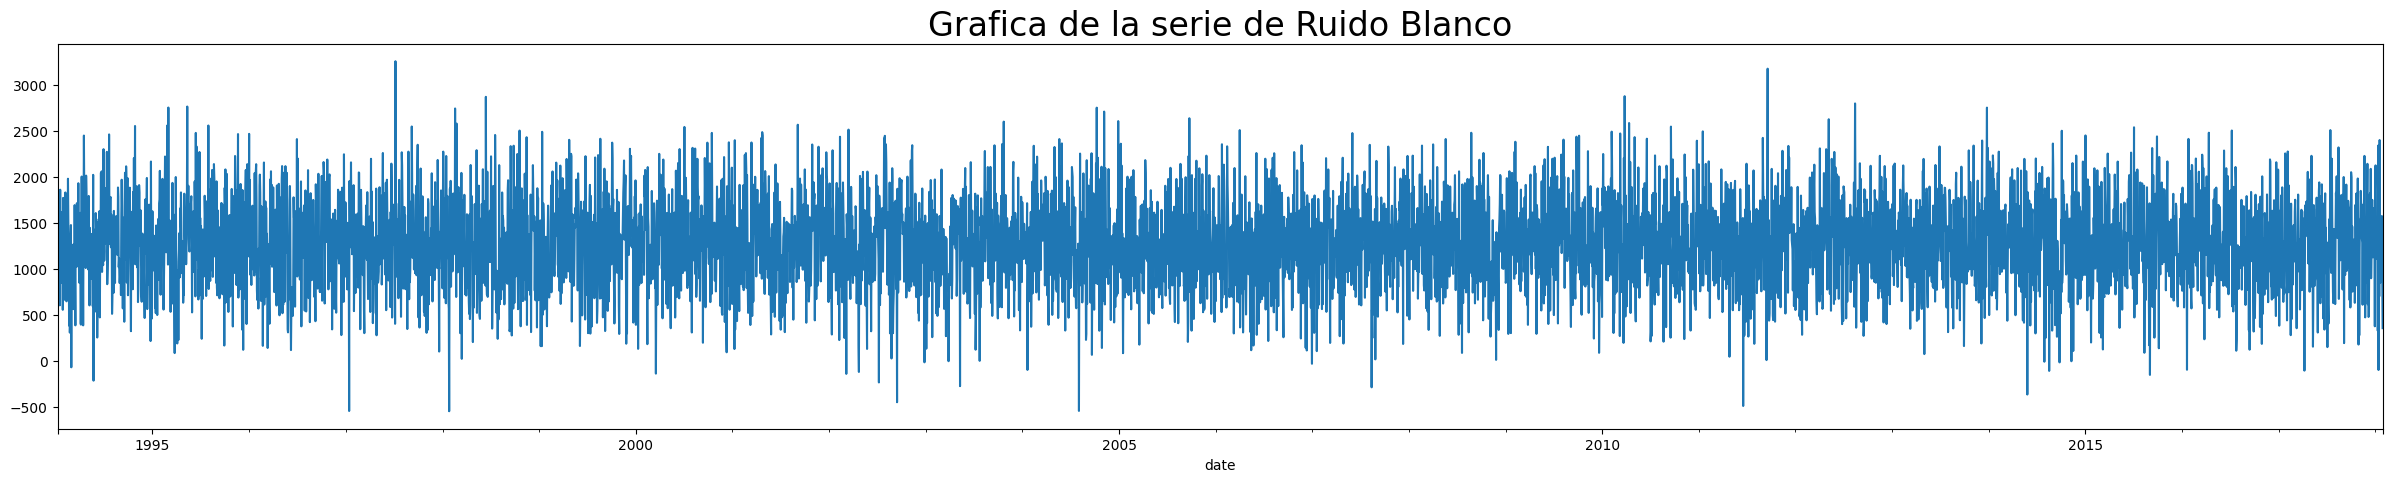

In [ ]:
df_comp.wn.plot(figsize = (30,5))
plt.title("Grafica de la serie de Ruido Blanco", size= 24)
plt.show()

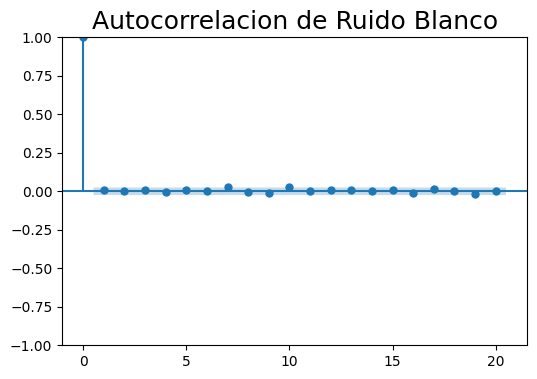

In [ ]:
plot_acf(df_comp.wn, lags=20)
plt.title("Autocorrelacion de Ruido Blanco", size= 18)
plt.show()

Random Walk

In [ ]:
# Simulamos el proceso
steps = np.random.standard_normal(1000)
steps[0]=0
random_walk=np.cumsum(steps)

In [ ]:
random_walk[:10]

array([ 0.        , -0.2429927 ,  0.86906429,  0.01935054,  0.16751028,
        0.09587586,  1.35863055,  1.06246602,  1.00708139,  1.06443847])

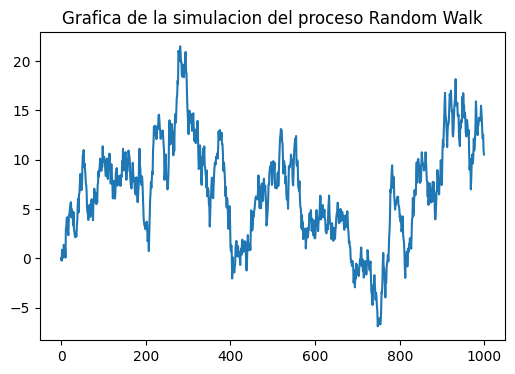

In [ ]:
plt.plot(random_walk)
plt.title("Grafica de la simulacion del proceso Random Walk")
plt.show()

*COMENTARIO NUEVO 6*

Una vez mas, la grafica simulada del proceso Random Walk, nos muestra una grafica similar a la serie de proceso de precios anterior, ya explicada.


In [ ]:
random_walk_acf_coef = acf(random_walk)
random_walk_acf_coef

array([1.        , 0.97964768, 0.95982759, 0.9403022 , 0.92231768,
       0.90341773, 0.88518425, 0.86853194, 0.85082584, 0.83302676,
       0.81407355, 0.79638815, 0.77904903, 0.76253053, 0.74661962,
       0.7303296 , 0.71472397, 0.69643724, 0.67836459, 0.66058778,
       0.6443194 , 0.6289838 , 0.61358063, 0.5992974 , 0.58686672,
       0.57710455, 0.56831485, 0.55789704, 0.54787675, 0.53721863,
       0.5302112 ])

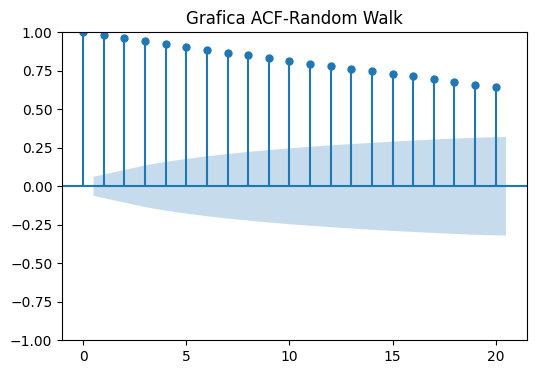

In [ ]:
plot_acf(random_walk, lags=20)
plt.title("Grafica ACF-Random Walk")
plt.show()

<body>
  <h1> Muchas gracias! 😀</h1>
</body>